# 04 Multi-variable linear regression
## Hypothesis
$$ H(x_1, x_2, x_3) = w_1x_1 + w_2x_2 + w_3x_3 + b $$

## Cost function
$$ cost(W, b) = \frac{1}{m}\sum_{i=1}^m (H(x_1, x_2, x_3)-y_i)^2$$

## Multi-variable
- 변수의 개수가 늘어나면 변수의 개수와 가중치의 개수가 늘어남

## Matrix multiplication
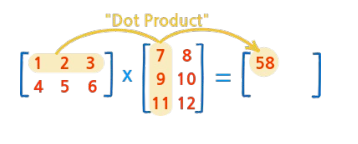

## Hypothesis using matrix
$$ (x_1 x_2 x_3) · (w_1 w_2 w_3)^T = (x_1w_1 + x_2w_2 + x_3w_3) $$
$$ H(X) = XW $$
- 앞 matrix의 열의 개수와 뒤 matrix의 행의 개수가 일치해야 함
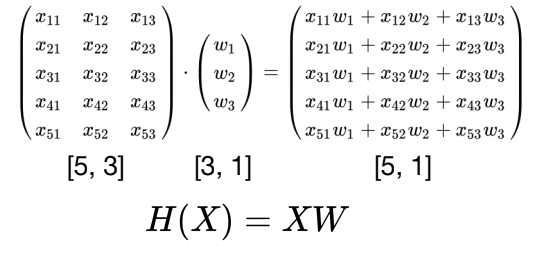

## Many x instances
- data의 instance가 많은 경우에도 동일하게 표현 가능
- matrix를 쓰는 큰 장점

## Hypothesis using matrix (n output)
$$ [n, 3] · [?, ?] = [n, 2] $$
- n은 instance의 개수, 2는 결과 값의 개수
- 이 때 W[?, ?] => [3, 2]

## WX vs XW
- Lecture (theory)
$$ H(x) = Wx + b $$
- Implementation (TensorFlow)
$$ H(X) = XW $$ 

In [ ]:
import tensorflow as tf
import numpy as np

print(tf.__version__)

2.8.2


In [ ]:
# data and label
x1 = [ 73.,  93.,  89.,  96.,  73.]
x2 = [ 80.,  88.,  91.,  98.,  66.]
x3 = [ 75.,  93.,  90., 100.,  70.]
Y  = [152., 185., 180., 196., 142.]

# random weights
w1 = tf.Variable(tf.random.normal([1]))
w2 = tf.Variable(tf.random.normal([1]))
w3 = tf.Variable(tf.random.normal([1]))
b  = tf.Variable(tf.random.normal([1]))

learning_rate = 0.000001

for i in range(1000+1):
    # tf.GradientTape() to record the gradient of the cost function
    with tf.GradientTape() as tape:
        hypothesis = w1 * x1 +  w2 * x2 + w3 * x3 + b
        cost = tf.reduce_mean(tf.square(hypothesis - Y))
    # calculates the gradients of the cost
    w1_grad, w2_grad, w3_grad, b_grad = tape.gradient(cost, [w1, w2, w3, b])
    
    # update w1,w2,w3 and b
    w1.assign_sub(learning_rate * w1_grad)
    w2.assign_sub(learning_rate * w2_grad)
    w3.assign_sub(learning_rate * w3_grad)
    b.assign_sub(learning_rate * b_grad)

    if i % 50 == 0:
      print("{:5} | {:12.4f}".format(i, cost.numpy()))

    0 |   10187.6270
   50 |     140.5898
  100 |      29.0406
  150 |      27.7368
  200 |      27.6563
  250 |      27.5897
  300 |      27.5234
  350 |      27.4572
  400 |      27.3913
  450 |      27.3254
  500 |      27.2598
  550 |      27.1944
  600 |      27.1291
  650 |      27.0640
  700 |      26.9992
  750 |      26.9344
  800 |      26.8699
  850 |      26.8055
  900 |      26.7414
  950 |      26.6774
 1000 |      26.6136


In [ ]:
data = np.array([
    # X1,   X2,    X3,   y
    [ 73.,  80.,  75., 152. ],
    [ 93.,  88.,  93., 185. ],
    [ 89.,  91.,  90., 180. ],
    [ 96.,  98., 100., 196. ],
    [ 73.,  66.,  70., 142. ]
], dtype=np.float32)

# slice data
X = data[:, :-1]
y = data[:, [-1]]

W = tf.Variable(tf.random.normal((3, 1)))
b = tf.Variable(tf.random.normal((1,)))

learning_rate = 0.000001

# hypothesis, prediction function
def predict(X):
    return tf.matmul(X, W) + b

print("epoch | cost")

n_epochs = 2000
for i in range(n_epochs+1):
    # tf.GradientTape() to record the gradient of the cost function
    with tf.GradientTape() as tape:
        cost = tf.reduce_mean((tf.square(predict(X) - y)))

    # calculates the gradients of the loss
    W_grad, b_grad = tape.gradient(cost, [W, b])

    # updates parameters (W and b)
    W.assign_sub(learning_rate * W_grad)
    b.assign_sub(learning_rate * b_grad)
    
    if i % 100 == 0:
        print("{:5} | {:10.4f}".format(i, cost.numpy()))

epoch | cost
    0 | 37361.2617
  100 |     9.1569
  200 |     4.5344
  300 |     4.5104
  400 |     4.4870
  500 |     4.4638
  600 |     4.4408
  700 |     4.4178
  800 |     4.3950
  900 |     4.3723
 1000 |     4.3497
 1100 |     4.3272
 1200 |     4.3049
 1300 |     4.2827
 1400 |     4.2606
 1500 |     4.2386
 1600 |     4.2168
 1700 |     4.1950
 1800 |     4.1734
 1900 |     4.1519
 2000 |     4.1305


# 05 Logistic Regression
## What is Logistic Regression?
### Logistic vs Linear
- 구분된 데이터와 연속적인 데이터
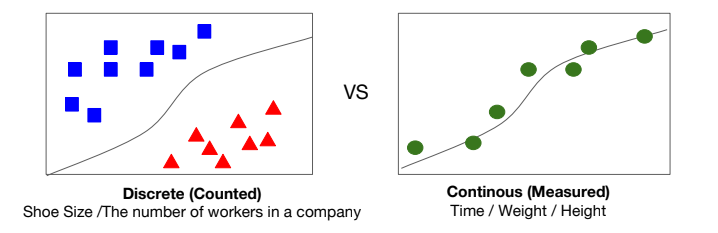
```
Logistic_Y = [[0], [0],[0],[1],[1],[1]]
Linear_Y = [828.659973, 833.450012, 819.23999, 828.349976] #Numeric
```

## How to solve?
### Hypothesis Representation
- Linear가 아닌 형태로 표현해야 함
```
hypothesis=tf.matmul(X, Θ) + b #linear Θ is an [1xn+1] matrix / Θ are parameters
```
- 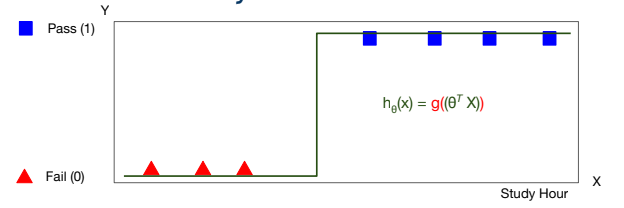

### Sigmoid/Logistic Function
$$ g(z) = 1/(1+e^{-z}) $$ 
```
hypothesis = tf.sigmoid(z)
hypothesis = tf.div(1., 1.+ tf.exp(z))
```
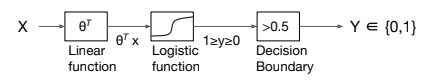

### Decision Boundary
- Decision Boundary를 결정
```
predicted = tf.cast(hypothesis > 0.5, dtype=tf.int32)
```

### Cost Function
- 학습을 통해서 최적의 모델을 찾아야 함
- h(x) = y then Cost = 0
$$ cost(h(x),y) = -ylog(h(x)) - (1-y)log(1-h(x)) $$
```
def loss_fn(hypothesis, labels):
    cost = -tf.reduce_mean(labels * tf.log(hypothesis) + (1-lables) * tf.log(1-hypothesis))
    return cost
```

### Optimizer (Gradient Descent)
- How to minimize the cost function?
```
def grad(hypothesis, label):
    with tf.GradientTape90 as tape:
        loss_value = loss_fn(hypothesis, labels)
    return tape.gradient(loss_value, [W, b])
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
optimizer.apply_gradients(grads_and_vars=zip(grads, [W, b]))
```

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

tf.random.set_seed(777)  # for reproducibility
print(tf.__version__)

2.8.2


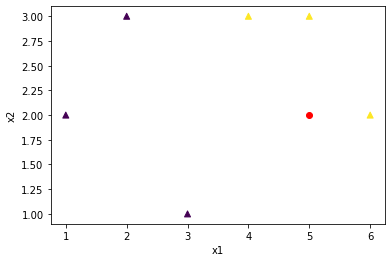

In [ ]:
x_train = [[1., 2.],
          [2., 3.],
          [3., 1.],
          [4., 3.],
          [5., 3.],
          [6., 2.]]
y_train = [[0.],
          [0.],
          [0.],
          [1.],
          [1.],
          [1.]]

x_test = [[5.,2.]]
y_test = [[1.]]


x1 = [x[0] for x in x_train]
x2 = [x[1] for x in x_train]

colors = [int(y[0] % 3) for y in y_train]
plt.scatter(x1,x2, c=colors , marker='^')
plt.scatter(x_test[0][0],x_test[0][1], c="red")

plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(len(x_train))#.repeat()

W = tf.Variable(tf.zeros([2,1]), name='weight')
b = tf.Variable(tf.zeros([1]), name='bias')

def logistic_regression(features):
    hypothesis  = tf.divide(1., 1. + tf.exp(tf.matmul(features, W) + b))
    return hypothesis

def loss_fn(hypothesis, features, labels):
    cost = -tf.reduce_mean(labels * tf.math.log(logistic_regression(features)) + (1 - labels) * tf.math.log(1 - hypothesis))
    return cost

optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

def accuracy_fn(hypothesis, labels):
    predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, labels), dtype=tf.int32))
    return accuracy

def grad(features, labels):
    with tf.GradientTape() as tape:
        loss_value = loss_fn(logistic_regression(features),features,labels)
    return tape.gradient(loss_value, [W,b])

EPOCHS = 1001

for step in range(EPOCHS):
    for features, labels  in iter(dataset):
        grads = grad(features, labels)
        optimizer.apply_gradients(grads_and_vars=zip(grads,[W,b]))
        if step % 100 == 0:
            print("Iter: {}, Loss: {:.4f}".format(step, loss_fn(logistic_regression(features),features,labels)))
test_acc = accuracy_fn(logistic_regression(x_test),y_test)
print("Testset Accuracy: {:.4f}".format(test_acc))

Iter: 0, Loss: 0.6874
Iter: 100, Loss: 0.5776
Iter: 200, Loss: 0.5349
Iter: 300, Loss: 0.5054
Iter: 400, Loss: 0.4838
Iter: 500, Loss: 0.4671
Iter: 600, Loss: 0.4535
Iter: 700, Loss: 0.4420
Iter: 800, Loss: 0.4319
Iter: 900, Loss: 0.4228
Iter: 1000, Loss: 0.4144
Testset Accuracy: 1.0000
